# Python for Data Analysis Project ~ Solution
This project will test your ability to work with real-world data using Python. You will need to clean, manipulate, and analyze datasets using tools like Pandas, NumPy, Matplotlib and Seaborn.

If you find this challenging, it indicates you might need to revisit the foundational concepts covered in the Python for Data Analysis classes. Review the lecture materials, and attempt the exercises again. The goal is to ensure you can confidently handle data operations and create insightful visualizations.

For this project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Instructions  

- Answer the questions or complete the tasks outlined in **bold** below.  
- Use the specific method described if applicable.  
- **Important:** Do not run your code in the same cell where the answer is provided. Create a new cell below/above and write your code there.  
- Running code in the same cell as the answer will overwrite the provided hints and answers. Ensure you follow this structure to retain all information.  

Good luck!  

## Data and Setup

**Import numpy and pandas**

In [29]:
import pandas as pd
import numpy as np

**Import visualization libraries and set %matplotlib inline.**

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

**Read in the 911 csv file as a dataframe called df from the data folder attached to the folder**

In [31]:
df = pd.read_csv('/content/911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


**Check the infomation of the df**

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


**Check in the statistical summary of df**

In [33]:
df.describe()

,lat,lng,zip,e
count,663522.000000,663522.000000,583323.000000,663522.0
mean,40.158162,-75.300105,19236.055791,1.0
std,0.220641,1.672884,298.222637,0.0
min,0.000000,-119.698206,1104.000000,1.0
25%,40.100344,-75.392735,19038.000000,1.0
50%,40.143927,-75.305143,19401.000000,1.0
75%,40.229008,-75.211865,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


**Check the head of df**

In [34]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1


## Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [35]:
df['zip'].value_counts().head(5)

,count
zip,
19401.0,45606
19464.0,43910
19403.0,34888
19446.0,32270
19406.0,22464


**What are the top 5 townships (twp) for 911 calls?**

In [36]:
df['twp'].value_counts().head(5)

,count
twp,
LOWER MERION,55490
ABINGTON,39947
NORRISTOWN,37633
UPPER MERION,36010
CHELTENHAM,30574


**Take a look at the 'title' column, how many unique title codes are there?**

In [37]:
df['title'].nunique()

148

## Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.**

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [38]:
df['Reason'] = df['title'].apply(lambda title: title.split(':') [0])
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire


**What is the most common Reason for a 911 call based off of this new column?**

In [39]:
df['Reason'].value_counts()

,count
Reason,
EMS,332692
Traffic,230208
Fire,100622


**Now use seaborn to create a countplot of 911 calls by Reason.**

<Axes: xlabel='Reason', ylabel='count'>

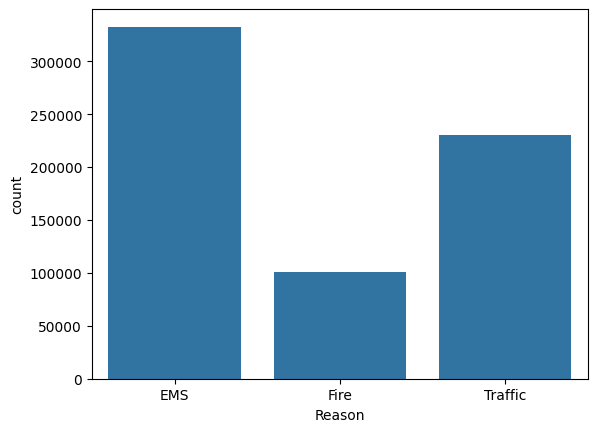

In [40]:
sns.countplot(x='Reason', data=df)

___
**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [41]:
df['timeStamp'].dtype

dtype('O')

**You should have seen that these timestamps are still strings. Use [pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [42]:
df['timestamp'] =  pd.to_datetime(df['timeStamp'])
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,timestamp
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:10:52
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:29:21
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 14:39:21


**You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [45]:
df['Hour'] = df['timestamp'].apply(lambda time: time.hour)
df['Month'] = df['timestamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timestamp'].apply(lambda time: time.dayofweek)
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,timestamp,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:10:52,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:29:21,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 14:39:21,14,12,3


**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [46]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,timestamp,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:10:52,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:29:21,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 14:39:21,14,12,Thu


**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

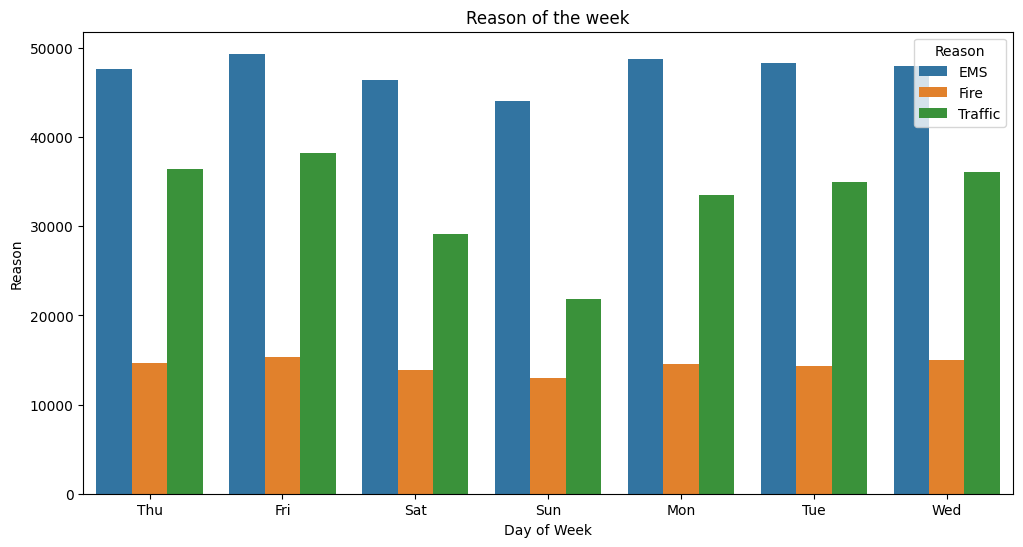

In [51]:
plt.figure(figsize=(12,6))
sns.countplot(x='Day of Week', data=df, hue='Reason')
xlabel = plt.xlabel('Day of Week')
ylabel = plt.ylabel('Reason')
titlelabel  = plt.title('Reason of the week')

**Now do the same for Month:**

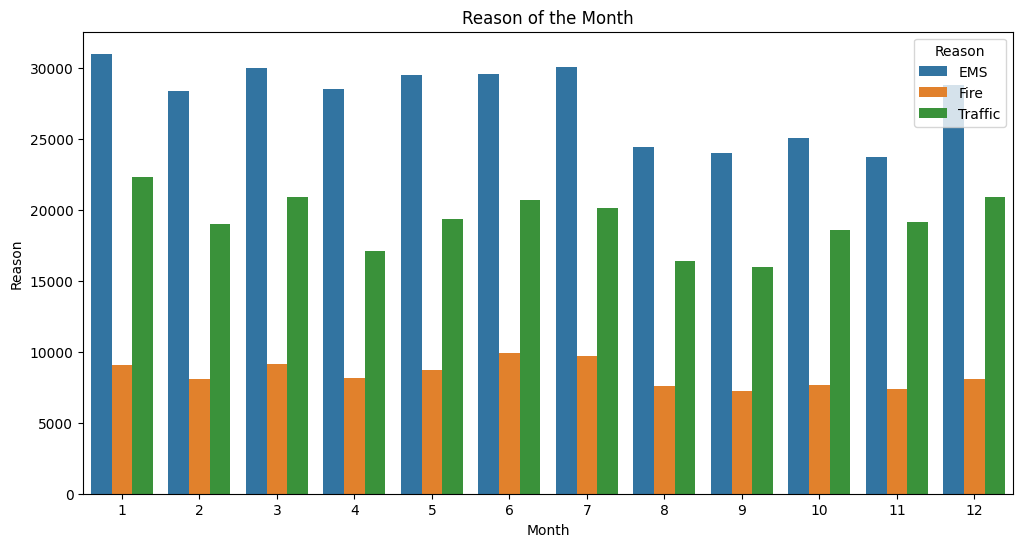

In [52]:
plt.figure(figsize=(12,6))
sns.countplot(x='Month', data=df, hue ='Reason')
xlabel = plt.xlabel('Month')
ylabel = plt.ylabel('Reason')
titlelabel = plt.title('Reason of the Month')

** Did you notice something strange about the Plot? **

In [ ]:
# It is missing some months! 9,10, and 11 are not there.

**You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [54]:
df.groupby('Month').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,timestamp,Hour,Day of Week
Month,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509,57509


**Now create a simple plot off of the dataframe indicating the count of calls per month.**

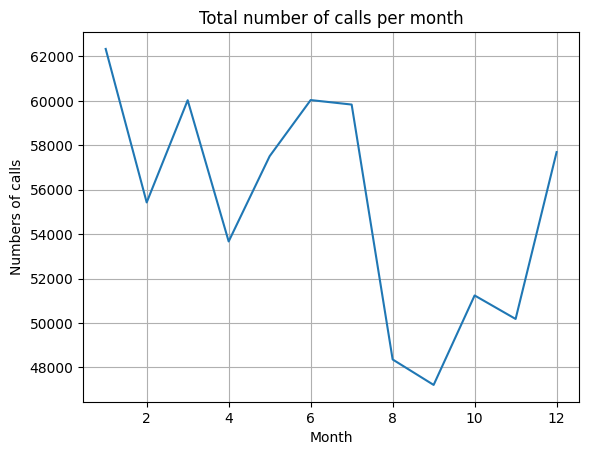

In [57]:
df.groupby('Month').count()['lat'].plot()
grid = plt.grid(True)
xlabel = plt.xlabel('Month')
ylabel = plt.ylabel('Numbers of calls')
titlelabel = plt.title('Total number of calls per month');

**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

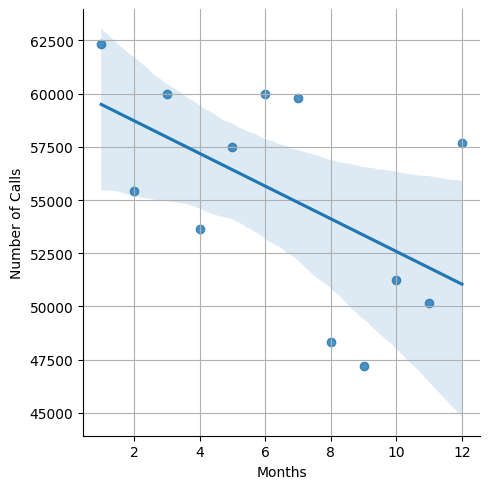

In [58]:
sns.lmplot(x='Month',y='twp',data=df.groupby('Month').count().reset_index())
grid = plt.grid(True)
xlabel = plt.xlabel('Months')
ylabel = plt.ylabel('Number of Calls');

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.**

In [63]:
df['Date'] = pd.to_datetime(df['timeStamp']).dt.date
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,timestamp,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:10:52,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:29:21,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 14:39:21,14,12,Thu,2015-12-10


**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

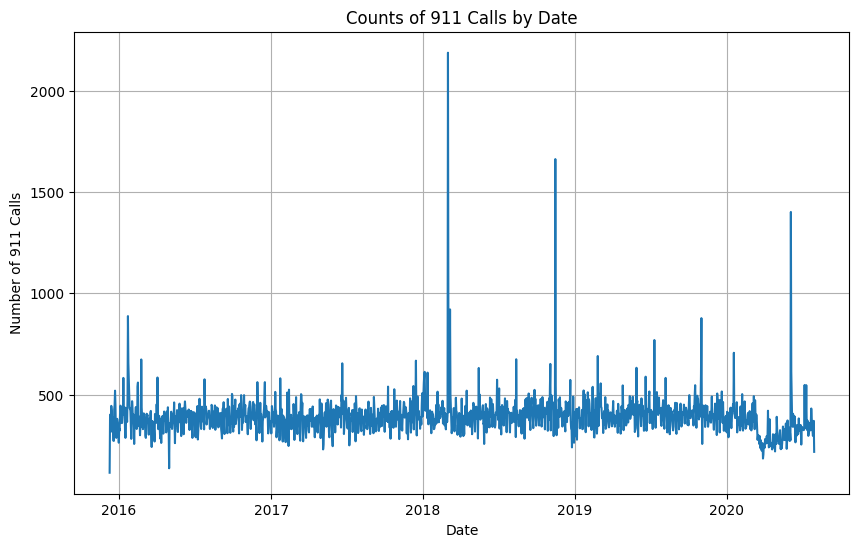

In [64]:
# Group by Date and count the number of calls
call_counts = df.groupby('Date').count()

# Rename the count column for clarity (e.g., 'timeStamp' -> '911 Calls')
call_counts.rename(columns={'timeStamp': '911 Calls'}, inplace=True)

# Plot the data
plt.figure(figsize=(10, 6))
call_counts['911 Calls'].plot()
plt.title("Counts of 911 Calls by Date")
plt.xlabel("Date")
plt.ylabel("Number of 911 Calls")
plt.grid(True)
plt.show()

## Well Done!